In [1]:
import multiprocessing
import matplotlib.pyplot as plt

# De zeef van Eratosthenes
De zeef van Eratosthenes (bibliothecaris van Alexandrië vanaf ca. 240 v.Chr.) is een al zeer lang bekend algoritme om priemgetallen te vinden. Deze elegante methode is vooral efficiënt wanneer zij wordt gebruikt voor de kleinere priemgetallen. De methode vergt echter het bijhouden van alle getallen kleiner dan de gebruikte bovengrens, wat naarmate de te bepalen priemgetallen groter worden een steeds groter nadeel wordt.
Bron: https://nl.wikipedia.org/wiki/Zeef_van_Eratosthenes

![Example](Afbeeldingen/Example.jpg)
Bron: https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes

### De code van de zeef

In [2]:
def Zeef_van_Eratosthenes(n, weergeven):
    
    weergeven_of_niet = weergeven
    aantal_priemgetallen = 0
    priem_getallen = []
    k = 2 
    
    for i in range(k, n+1): # start bij 2, eindigt bij n+1
        
        if i not in priem_getallen:
            if weergeven_of_niet == True:
                print(i)
                aantal_priemgetallen += 1
            else:
                aantal_priemgetallen += 1
                
            for j in range(i*i, n+1, i): 
                priem_getallen.append(j)
                
    if weergeven_of_niet == True:            
        print('Totaal aantal priemgetallen is:', + aantal_priemgetallen)

### Tests
Hier ga ik testen of we daadwerkelijk de getallen terug krijgen die we willen. Dat doe ik door het handmatig na te gaan op een klein voorbeeld. Hier doe ik het op het getal 30, de verwachte getallen zijn: 2, 3, 5, 7, 11, 13, 17, 19

In [3]:
print(Zeef_van_Eratosthenes(20, True));

2
3
5
7
11
13
17
19
Totaal aantal priemgetallen is: 8
None


### Runtime

In [4]:
%timeit -n 5 Zeef_van_Eratosthenes(100, False)

57.1 µs ± 523 ns per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [5]:
%timeit -n 5 Zeef_van_Eratosthenes(1000, False)

5.16 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [6]:
%timeit -n 5 Zeef_van_Eratosthenes(10000, False)

537 ms ± 4.26 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [8]:
def plot(tijden):

    names = ['100', '1000', '10000']
    values = tijden

    plt.figure(figsize=(9, 3))

    plt.subplot(131)
    plt.bar(names, values)
    plt.subplot(132)
    plt.scatter(names, values)
    plt.subplot(133)
    plt.plot(names, values)
    plt.suptitle('Categorical Plotting')
    plt.show()

### Plots
Hieronder ziet u drie plots met de tijd die het duurt om alle priemgetallen onder een bepaald getal te vinden, deze getallen zijn honerd, duizend en tien duizend. De tijden staan in milliseconden. De y-as is de uitkomst in ms, de x-as staat bij welke getallen hij kijkt naar alle priemgetallen.

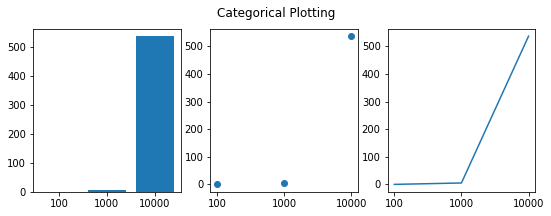

In [9]:
plot([0.0571, 5.16, 537])

### Analyse eerste plots
In de grafieken is uit te lezen dat als de grote van het getal met 10 vermenigvuldigd wordt, de duur met rond de honderd vermenigvuldigd wordt. Ik kan het jammer genoeg niet vergelijken met andere tijden omdat MPI niet werkt.

In [10]:
def thread_test(functie):

    threads = [1,2,4,8]

    for thread_count in threads:
        pool = multiprocessing.Pool(thread_count)
        print(pool)

        results = [pool.apply_async(functie)]
        print(results)
        %timeit functie

In [11]:
thread_test(Zeef_van_Eratosthenes(100, False))

<multiprocessing.pool.Pool state=RUN pool_size=1>
18 ns ± 0.0684 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=2>
17.8 ns ± 0.132 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=4>
17.9 ns ± 0.0936 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=8>
17.9 ns ± 0.0762 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [12]:
thread_test(Zeef_van_Eratosthenes(1000, False))

<multiprocessing.pool.Pool state=RUN pool_size=1>
17.9 ns ± 0.0794 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=2>
18 ns ± 0.192 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=4>
17.8 ns ± 0.138 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=8>
17.8 ns ± 0.134 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [13]:
thread_test(Zeef_van_Eratosthenes(10000, False)) # hoger dan werkt het niet meer...

<multiprocessing.pool.Pool state=RUN pool_size=1>
17.9 ns ± 0.206 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=2>
17.9 ns ± 0.139 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=4>
17.8 ns ± 0.067 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=8>
18 ns ± 0.0623 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [14]:
def plot_maken(tijden, tijden2, tijden3):

    plt.plot([1,2,4,8], tijden)
    plt.plot([1,2,4,8], tijden2)
    plt.plot([1,2,4,8], tijden3)

    plt.ylabel('Nanoseconde')
    plt.xlabel('Threads')
    plt.title('tijdsduur met verschillende hoeveelheden threads')
    plt.legend(['100', '1000', '10000'], loc='upper right')

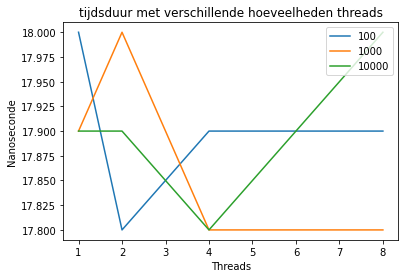

In [15]:
plot_maken([18, 17.8, 17.9, 17.9], [17.9, 18, 17.8, 17.8], [17.9, 17.9, 17.8, 18])

### Analyse tweede grafiek
Er is geen/minieme tijdwinst geboekt, de 0.01 nanoseconde verschil merkt niemand op.

### Ontwerp voor als MPI wel had gewerkt
Ik had een idee om als MPI wel gewerkt had het zo te doen:

Als bijvoorbeeld een core bezig is met alle vermenigvuldigingen van 2 te marken, laat je de volgende core werken aan alle vermenigvuldigen van 3, en zo voort. Zo wordt als het werkt goed tegelijk gedaan en zal dit tijdswinst moeten maken.
En als alles gemarkeerd is het de eerste core zijn taak om alles te printen.

### Bewijs dat het mpi niet werkt bij mij

![ScreenHunter89](Afbeeldingen/ScreenHunter89.jpg)